In [2]:
import os
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interpn

In [3]:
df_sdd = pd.read_csv('./lake_para_SDD_v6-10km2-new.csv')
df_sdd

,Unnamed: 0,Long,Lat,Depth,Area,Elev,slo,discharge,residence_time,Area/Depth,SDD_DGRN
0,0,-179.992498,65.362651,1.7,34.91,11.0,0.58,7.303,93.1,20.535294,0.590205
1,1,-178.425781,65.552083,3.8,19.83,16.0,1.34,1.090,800.2,5.218421,0.419538
2,2,-178.303125,71.221818,41.7,14.08,153.0,11.51,0.023,295656.0,0.337650,0.132637
3,3,-175.750586,66.183018,25.9,15.02,96.0,7.49,1.649,2726.2,0.579923,6.036397
4,5,-173.744792,65.873801,9.4,30.88,15.0,2.68,3.621,932.4,3.285106,0.266687
...,...,...,...,...,...,...,...,...,...,...,...
16516,16684,179.513897,71.317372,48.1,17.71,457.0,12.40,0.059,167078.1,0.368191,0.443440
16517,16685,179.561616,71.011534,57.5,18.43,333.0,14.35,0.015,816912.4,0.320522,0.301635
16518,16686,179.657728,65.609374,9.3,17.30,47.0,2.99,1.057,1761.3,1.860215,0.491394
16519,16687,179.777005,67.504004,10.9,36.63,195.0,2.93,16.234,284.6,3.360550,6.441444


In [4]:
sdd_all = df_sdd['SDD_DGRN'].values

In [5]:
'''Slope'''
slope_all = df_sdd['slo'].values
# plt.hist(slope_all)
resu_slope = np.zeros_like(slope_all)
for i in range(slope_all.shape[0]):
  if slope_all[i] < 0:
    resu_slope[i] = 1
  elif slope_all[i] >= 0 and slope_all[i] < 1:
    resu_slope[i] = 2
  elif slope_all[i] >= 1 and slope_all[i] < 2:
    resu_slope[i] = 3
  elif slope_all[i] >= 2 and slope_all[i] < 3:
    resu_slope[i] = 4
  elif slope_all[i] >= 3 and slope_all[i] < 5:
    resu_slope[i] = 5
  elif slope_all[i] >= 5 and slope_all[i] < 10:
    resu_slope[i] = 6
  elif slope_all[i] >= 10 and slope_all[i] < 15:
    resu_slope[i] = 7
  elif slope_all[i] >= 15 and slope_all[i] < 20:
    resu_slope[i] = 8
  elif slope_all[i] >= 20:
    resu_slope[i] = 9
del i

In [11]:
'''slope'''
depth_all = df_sdd['Depth'].values
resu_depth = np.zeros_like(depth_all)
for i in range(depth_all.shape[0]):
  if depth_all[i] >= 0 and depth_all[i] < 5:
    resu_depth[i] = 1
  elif depth_all[i] >= 5 and depth_all[i] < 10:
    resu_depth[i] = 2
  elif depth_all[i] >= 10 and depth_all[i] < 15:
    resu_depth[i] = 3
  elif depth_all[i] >= 15 and depth_all[i] < 20:
    resu_depth[i] = 4
  elif depth_all[i] >= 20 and depth_all[i] < 30:
    resu_depth[i] = 5
  elif depth_all[i] >= 30 and depth_all[i] < 40:
    resu_depth[i] = 6
  elif depth_all[i] >= 40 and depth_all[i] < 50:
    resu_depth[i] = 7
  elif depth_all[i] >= 50 and depth_all[i] < 100:
    resu_depth[i] = 8
  elif depth_all[i] >= 100:
    resu_depth[i] = 9
del i

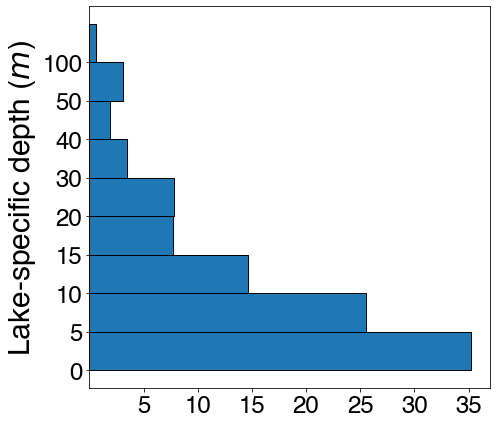

In [12]:
plt.figure(figsize=(7,6))
plt.rcParams["font.family"] = ["Helvetica"]
# matplotlib histogram
bin2 = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
label = ['0','5','10','15','20','30','40','50','100']
plt.hist(resu_depth, color = 'tab:blue', edgecolor = 'black', density=True,
          bins = bin2, orientation='horizontal', rwidth=None, align='right')
plt.yticks([1,2,3,4,5,6,7,8,9], label, fontsize=24)
plt.ylabel('Lake-specific depth (${m}$)',fontsize=30)
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35],
           [5, 10, 15, 20, 25, 30, 35], fontsize=24)
plt.tight_layout()
plt.savefig('./Fig10e.png',  dpi=1000)

In [13]:
mean_depth = []
for i in range(np.int(np.min(np.log(depth_all))), np.int(np.max(np.log(depth_all))+1)):
    num_mid = []
    cal_mid = []
    for j in range(len(depth_all)):
        if np.log(depth_all)[j] >= i and np.log(depth_all)[j] < i + 1:
            num_mid.append(j)
            cal_mid.append(sdd_all[j])
    mean_depth.append(np.nanmean(cal_mid))
    print(mean_depth)

[0.2658792441666667]
[0.2658792441666667, 0.7828030263611111]
[0.2658792441666667, 0.7828030263611111, 0.6098631832657387]
[0.2658792441666667, 0.7828030263611111, 0.6098631832657387, 1.4090929809476473]
[0.2658792441666667, 0.7828030263611111, 0.6098631832657387, 1.4090929809476473, 2.030844455825631]
[0.2658792441666667, 0.7828030263611111, 0.6098631832657387, 1.4090929809476473, 2.030844455825631, 2.3270901911397184]
[0.2658792441666667, 0.7828030263611111, 0.6098631832657387, 1.4090929809476473, 2.030844455825631, 2.3270901911397184, 2.8497025614127662]
[0.2658792441666667, 0.7828030263611111, 0.6098631832657387, 1.4090929809476473, 2.030844455825631, 2.3270901911397184, 2.8497025614127662, 3.057177331625]
[0.2658792441666667, 0.7828030263611111, 0.6098631832657387, 1.4090929809476473, 2.030844455825631, 2.3270901911397184, 2.8497025614127662, 3.057177331625, 2.509516503]


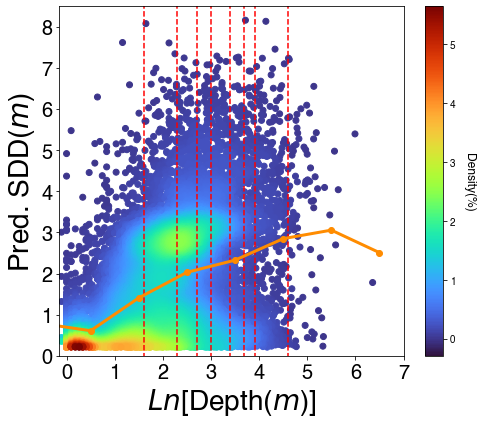

In [14]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,6))
    data , x_e, y_e = np.histogram2d(x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    z2 = z/x.shape[0]*100
    if sort :
        idx = z2.argsort()
        x, y, z2 = x[idx], y[idx], z2[idx]
    split_depth = np.log(np.array([5,10,15,20,30,40,50,100]))
    plt.vlines(split_depth,-2,12,linestyles='dashed',color='red')
    ax1 = ax.scatter(x, y, c=z2, cmap='turbo',**kwargs )
    ax.set_ylabel('Pred. SDD(${m}$)',fontsize=28)
    ax.set_xlabel('${Ln}$[Depth(${m}$)]',fontsize=28)
    ax.set_xlim([-0.15,7])
    ax.set_ylim([0,8.5])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    return ax1, ax,fig

ax1, ax, fig = density_scatter(np.log(depth_all), sdd_all,  bins=[20,20])
plt.plot([-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5], mean_depth, linewidth=3,marker='o',color='darkorange')
clb = fig.colorbar(ax1, orientation='vertical')
clb.set_label('Density(%)', labelpad=20, y=0.5, rotation=270, fontsize=12)
plt.tight_layout()
plt.savefig('./Fig10f.png', dpi=1000)

In [15]:
'''Area'''
area_all = df_sdd['Area'].values
resu_area = np.zeros_like(area_all)
for i in range(area_all.shape[0]):
  if area_all[i] >= 10 and area_all[i] < 12:
    resu_area[i] = 0
  elif area_all[i] >= 12 and area_all[i] < 15:
    resu_area[i] = 1
  elif area_all[i] >= 15 and area_all[i] < 20:
    resu_area[i] = 2
  elif area_all[i] >= 20 and area_all[i] < 30:
    resu_area[i] = 3
  elif area_all[i] >= 30 and area_all[i] < 40:
    resu_area[i] = 4
  elif area_all[i] >= 40 and area_all[i] < 50:
    resu_area[i] = 5
  elif area_all[i] >= 50 and area_all[i] < 100:
    resu_area[i] = 6
  elif area_all[i] >= 100 and area_all[i] < 500:
    resu_area[i] = 7
  elif area_all[i] >= 500 and area_all[i] < 1000:
    resu_area[i] = 8
  else:
    resu_area[i] = 9
del i

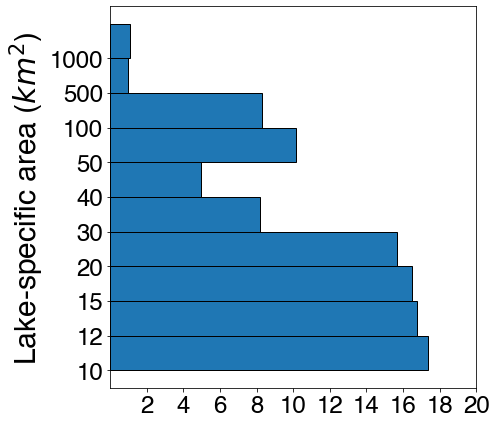

In [16]:
plt.figure(figsize=(7,6))
plt.rcParams["font.family"] = ["Helvetica"]
bin = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
labels = ['10','12','15','20','30','40','50','100','500','1000']
plt.hist(resu_area, color = 'tab:blue', edgecolor = 'black', density=True,
          bins = bin, orientation='horizontal',align='right',label=labels,)
plt.yticks([0,1,2,3,4,5,6,7,8,9], labels, fontsize=24)
plt.ylabel('Lake-specific area (${km^2}$)',fontsize=30)
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20],
           [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], fontsize=24)
plt.tight_layout()
plt.savefig('./Fig10a.png', dpi=1000)


In [18]:
for i in range(np.int(np.min(np.log(area_all))), np.int(np.max(np.log(area_all))+1)):
    print(i)
mean_area = []
for i in range(np.int(np.min(np.log(area_all))), np.int(np.max(np.log(area_all))+1)):
    num_mid = []
    cal_mid = []
    for j in range(len(area_all)):
        if np.log(area_all)[j] >= i and np.log(area_all)[j] < i + 1:
            num_mid.append(j)
            cal_mid.append(sdd_all[j])
    mean_area.append(np.nanmean(cal_mid))
    print(mean_area)

2
3
4
5
6
7
8
9
10
11
12
[1.6133665592575885]
[1.6133665592575885, 1.633334946426497]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965, 1.7324063653133335]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965, 1.7324063653133335, 1.7782585705328466]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965, 1.7324063653133335, 1.7782585705328466, 1.8856400332105263]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965, 1.7324063653133335, 1.7782585705328466, 1.8856400332105263, 1.788678526159091]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965, 1.7324063653133335, 1.7782585705328466, 1.8856400332105263, 1.788678526159091, 2.5476684996666665]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965, 1.7324063653133335, 1.7782585705328466, 1.8856400332105263, 1.788678526159091, 2.5476684996666665, 3.7856306429]
[1.6133665592575885, 1.633334946426497, 1.6603856412987965, 1.7324063653133335, 1.7

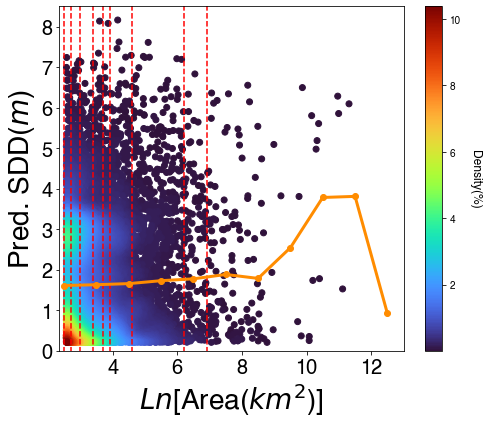

In [19]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,6))
    data , x_e, y_e = np.histogram2d(x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    z2 = z/x.shape[0]*100
    if sort :
        idx = z2.argsort()
        x, y, z2 = x[idx], y[idx], z2[idx]
    split_area = np.log(np.array([12,15,20,30,40,50,100,500,1000]))
    plt.vlines(split_area,-2,12,linestyles='dashed',color='red')
    ax1 = ax.scatter(x, y, c=z2, cmap='turbo', **kwargs )
    ax.set_ylabel('Pred. SDD(${m}$)',fontsize=28)
    ax.set_xlabel('${Ln}$[Area(${km^2}$)]',fontsize=28)
    ax.set_xlim([2.35,13])
    ax.set_ylim([0,8.5])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    return ax1, ax,fig

ax1, ax, fig = density_scatter(np.log(area_all), sdd_all,  bins=[20,20])
plt.plot([2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5], mean_area, linewidth=3,marker='o',color='darkorange')
clb = fig.colorbar(ax1, orientation='vertical')
clb.set_label('Density(%)', labelpad=20, y=0.5, rotation=270, fontsize=12)
plt.tight_layout()
plt.savefig('./Fig10b.png', dpi=1000)

In [20]:
'''Elevation'''
elev_all = df_sdd['Elev'].values
resu_elev = np.zeros_like(elev_all)

In [21]:
for i in range(elev_all.shape[0]):
    if elev_all[i] <= 0:
        resu_elev[i] = 0
    elif elev_all[i] >= 0 and elev_all[i] < 20:
        resu_elev[i] = 1
    elif elev_all[i] >= 20 and elev_all[i] < 50:
        resu_elev[i] = 2
    elif elev_all[i] >= 50 and elev_all[i] < 100:
        resu_elev[i] = 3
    elif elev_all[i] >= 100 and elev_all[i] < 200:
        resu_elev[i] = 4
    elif elev_all[i] >= 200 and elev_all[i] < 300:
        resu_elev[i] = 5
    elif elev_all[i] >= 300 and elev_all[i] < 400:
        resu_elev[i] = 6
    elif elev_all[i] >= 400 and elev_all[i] < 500:
        resu_elev[i] = 7
    elif elev_all[i] >= 500 and elev_all[i] < 1000:
        resu_elev[i] = 8
    else:
        resu_elev[i] = 9
del i

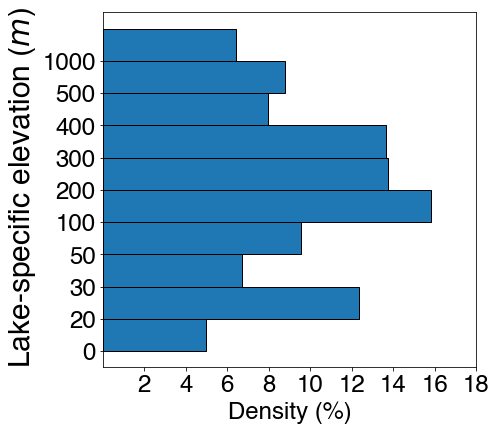

In [22]:
plt.figure(figsize=(7,6))
plt.rcParams["font.family"] = ["Helvetica"]
bin = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
labels = ['0','20','30','50','100','200','300','400','500','1000']
plt.hist(resu_elev, color = 'tab:blue', edgecolor = 'black', density=True,
          bins = bin, orientation='horizontal',align='right',label=labels,)
plt.yticks([0,1,2,3,4,5,6,7,8,9], labels, fontsize=24)
plt.ylabel('Lake-specific elevation (${m}$)',fontsize=30, loc='bottom')
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18],
           [2, 4, 6, 8, 10, 12, 14, 16, 18], fontsize=24)
plt.xlabel('Density (%)', fontsize=24)
plt.tight_layout()
plt.savefig('./Fig10i.png', dpi=1000)

In [23]:
elev_all2 = []
sdd_all1 = []
for i in range(elev_all.shape[0]):
    if elev_all[i] <= 0:
        pass
    else:
        elev_all2.append(elev_all[i])
        sdd_all1.append(sdd_all[i])
elev_all2 = np.array(elev_all2)
sdd_all2 = np.array(sdd_all1)
resu_elev = np.zeros_like(elev_all2)

In [24]:
for i in range(np.int(np.min(np.log(elev_all2))), np.int(np.max(np.log(elev_all2))+1)):
    print(i)
mean_elev = []
for i in range(np.int(np.min(np.log(elev_all2))), np.int(np.max(np.log(elev_all2))+1)):
    num_mid = []
    cal_mid = []
    for j in range(len(elev_all2)):
        if np.log(elev_all2)[j] >= i and np.log(elev_all2)[j] < i + 1:
            num_mid.append(j)
            cal_mid.append(sdd_all1[j])
    mean_elev.append(np.nanmean(cal_mid))
    print(mean_elev)

0
1
2
3
4
5
6
7
8
[0.6897176427938462]
[0.6897176427938462, 0.9450627742261485]
[0.6897176427938462, 0.9450627742261485, 1.0618429037479271]
[0.6897176427938462, 0.9450627742261485, 1.0618429037479271, 1.3310167562115225]
[0.6897176427938462, 0.9450627742261485, 1.0618429037479271, 1.3310167562115225, 1.5351598727809765]
[0.6897176427938462, 0.9450627742261485, 1.0618429037479271, 1.3310167562115225, 1.5351598727809765, 1.9489521963590306]
[0.6897176427938462, 0.9450627742261485, 1.0618429037479271, 1.3310167562115225, 1.5351598727809765, 1.9489521963590306, 2.04560992227518]
[0.6897176427938462, 0.9450627742261485, 1.0618429037479271, 1.3310167562115225, 1.5351598727809765, 1.9489521963590306, 2.04560992227518, 1.2969907913542038]
[0.6897176427938462, 0.9450627742261485, 1.0618429037479271, 1.3310167562115225, 1.5351598727809765, 1.9489521963590306, 2.04560992227518, 1.2969907913542038, 1.7219810286641601]


In [25]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,6))
    data , x_e, y_e = np.histogram2d(x, y, bins = bins)
    z = interpn((0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    z2 = z/x.shape[0]*100
    split_area = np.log(np.array([0,20,50,100,200,300,400,500,1000]))
    plt.vlines(split_area,-2,12,linestyles='dashed',color='red')
    ax1 = ax.scatter(x, y, c=z2, cmap='turbo' ,**kwargs )
    ax.set_ylabel('Pred. SDD(${m}$)',fontsize=28)
    ax.set_xlabel('${Ln}$[Elevation(${m}$)]',fontsize=28)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylim([0,8.5])
    return ax1, ax,fig

<ipython-input-25-613e37a9ed04>:10: RuntimeWarning: divide by zero encountered in log
  split_area = np.log(np.array([0,20,50,100,200,300,400,500,1000]))


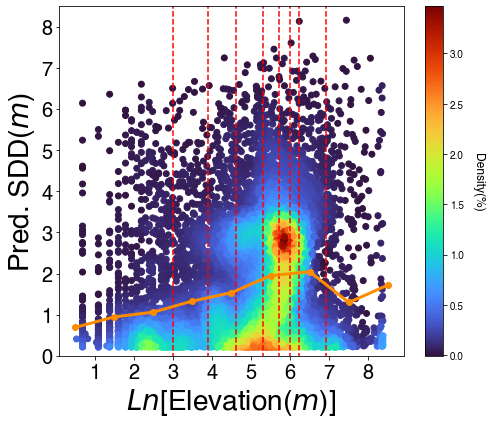

In [26]:
ax1, ax, fig = density_scatter(np.log(elev_all2), sdd_all1, bins=[20,20])
plt.plot([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], mean_elev, linewidth=3,marker='o',color='darkorange')
clb = fig.colorbar(ax1, orientation='vertical')
clb.set_label('Density(%)', labelpad=20, y=0.5, rotation=270, fontsize=12)
plt.tight_layout()
plt.savefig('./Fig10j.png', dpi=1000)

In [27]:
'''Discharge'''
dis_all = df_sdd['discharge'].values

In [28]:
dis_all2 = []
sdd_all2 = []
for i in range(dis_all.shape[0]):
    if dis_all[i] <= 0:
        pass
    else:
        dis_all2.append(dis_all[i])
        sdd_all2.append(sdd_all[i])
dis_all2 = np.array(dis_all2)
sdd_all2 = np.array(sdd_all2)
resu_dis = np.zeros_like(dis_all2)

In [29]:
for i in range(dis_all2.shape[0]):
    if dis_all2[i] >= 0 and dis_all2[i] < 0.5:
        resu_dis[i] = 0
    elif dis_all2[i] >= 0.5 and dis_all2[i] < 2:
        resu_dis[i] = 1
    elif dis_all2[i] >= 2 and dis_all2[i] < 5:
        resu_dis[i] = 2
    elif dis_all2[i] >= 5 and dis_all2[i] < 10:
        resu_dis[i] = 3
    elif dis_all2[i] >= 10 and dis_all2[i] < 20:
        resu_dis[i] = 4
    elif dis_all2[i] >= 20 and dis_all2[i] < 50:
        resu_dis[i] = 5
    elif dis_all2[i] >= 50 and dis_all2[i] < 100:
        resu_dis[i] = 6
    elif dis_all2[i] >= 100 and dis_all2[i] < 1000:
        resu_dis[i] = 7
    elif dis_all2[i] >= 1000 and dis_all2[i] < 2000:
        resu_dis[i] = 8
    elif dis_all2[i] >= 2000:
        resu_dis[i] = 9
del i

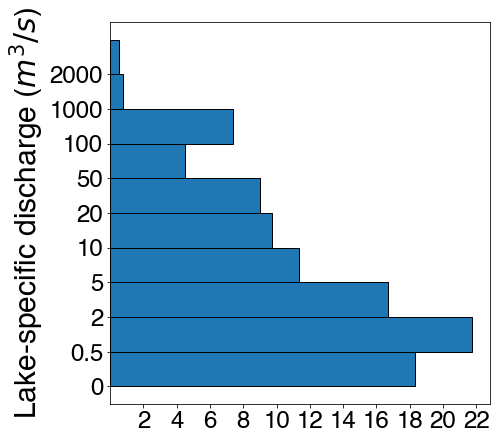

In [30]:
plt.figure(figsize=(7,6))
plt.rcParams["font.family"] = ["Helvetica"]
# matplotlib histogram
bin = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
labels = ['0','0.5','2','5','10','20','50','100','1000','2000']
plt.hist(resu_dis, color = 'tab:blue', edgecolor = 'black', density=True,
          bins = bin, orientation='horizontal',align='right',label=labels,)
plt.yticks([0,1,2,3,4,5,6,7,8,9], labels, fontsize=24)
plt.ylabel('Lake-specific discharge (${m^3/s}$)',fontsize=30)
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22],
           [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], fontsize=24)
plt.tight_layout()
plt.savefig('./Fig10c.png', dpi=1000)

In [31]:
for i in range(np.int(np.min(np.log(dis_all2))), np.int(np.max(np.log(dis_all2))+1)):
    print(i)
mean_dis = []
for i in range(np.int(np.min(np.log(dis_all2))), np.int(np.max(np.log(dis_all2))+1)):
    num_mid = []
    cal_mid = []
    for j in range(len(dis_all2)):
        if np.log(dis_all2)[j] >= i and np.log(dis_all2)[j] < i + 1:
            num_mid.append(j)
            cal_mid.append(sdd_all2[j])
    mean_dis.append(np.nanmean(cal_mid))
    print(mean_dis)

-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
[0.57005894565]
[0.57005894565, 0.6790124691699999]
[0.57005894565, 0.6790124691699999, 0.8328927585606695]
[0.57005894565, 0.6790124691699999, 0.8328927585606695, 1.07144648381198]
[0.57005894565, 0.6790124691699999, 0.8328927585606695, 1.07144648381198, 1.4759310300708661]
[0.57005894565, 0.6790124691699999, 0.8328927585606695, 1.07144648381198, 1.4759310300708661, 1.5889659274261283]
[0.57005894565, 0.6790124691699999, 0.8328927585606695, 1.07144648381198, 1.4759310300708661, 1.5889659274261283, 1.7953604305522286]
[0.57005894565, 0.6790124691699999, 0.8328927585606695, 1.07144648381198, 1.4759310300708661, 1.5889659274261283, 1.7953604305522286, 1.8339918113628975]
[0.57005894565, 0.6790124691699999, 0.8328927585606695, 1.07144648381198, 1.4759310300708661, 1.5889659274261283, 1.7953604305522286, 1.8339918113628975, 1.8071184065385604]
[0.57005894565, 0.6790124691699999, 0.8328927585606695, 1.07144648381198, 1.4759310300708661, 1.58896592742612

In [32]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,6))
    data , x_e, y_e = np.histogram2d(x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    z2 = z/x.shape[0]*100
    if sort :
        idx = z2.argsort()
        x, y, z2 = x[idx], y[idx], z2[idx]
    
    ax1 = ax.scatter(x, y, c=z2, cmap='turbo',**kwargs )
    ax.set_ylabel('Pred. SDD(${m}$)',fontsize=28)
    ax.set_xlabel('${Ln}$[Discharge(${m^3/s}$)]',fontsize=28)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylim([0,8.5])
    return ax1, ax,fig

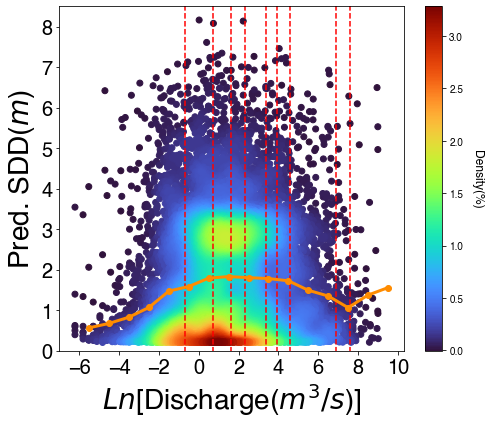

In [33]:
ax1, ax, fig = density_scatter(np.log(dis_all2), sdd_all2, bins=[20,20])
clb = fig.colorbar(ax1, orientation='vertical')
split_area = np.log(np.array([0.5,2,5,10,30,50,100,1000,2000]))
plt.vlines(split_area,-2,12,linestyles='dashed',color='red')
plt.plot([-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], mean_dis, linewidth=3,marker='o',color='darkorange')
clb.set_label('Density(%)', labelpad=20, y=0.5, rotation=270, fontsize=12)
plt.tight_layout()
plt.savefig('./Fig10d.png', dpi=1000)

In [34]:
'''Residence time'''
rest_all = df_sdd['residence_time'].values

In [35]:
rest_all2 = []
sdd_all3 = []
for i in range(rest_all.shape[0]):
    if dis_all[i] <= 0:
        pass
    else:
        rest_all2.append(rest_all[i])
        sdd_all3.append(sdd_all[i])
rest_all2 = np.array(rest_all2)
sdd_all3 = np.array(sdd_all3)
resu_rest = np.zeros_like(rest_all2)

In [36]:
for i in range(rest_all2.shape[0]):
    if rest_all2[i] >= 0 and rest_all2[i] < 50:
        resu_rest[i] = 0
    elif rest_all2[i] >= 50 and rest_all2[i] < 200:
        resu_rest[i] = 1
    elif rest_all2[i] >= 200 and rest_all2[i] < 500:
        resu_rest[i] = 2
    elif rest_all2[i] >= 500 and rest_all2[i] < 1000:
        resu_rest[i] = 3
    elif rest_all2[i] >= 1000 and rest_all2[i] < 2000:
        resu_rest[i] = 4
    elif rest_all2[i] >= 2000 and rest_all2[i] < 5000:
        resu_rest[i] = 5
    elif rest_all2[i] >= 5000 and rest_all2[i] < 10000:
        resu_rest[i] = 6
    elif rest_all2[i] >= 10000 and rest_all2[i] < 50000:
        resu_rest[i] = 7
    elif rest_all2[i] >= 50000 and rest_all2[i] < 100000:
        resu_rest[i] = 8
    elif rest_all2[i] >= 100000:
        resu_rest[i] = 9
del i

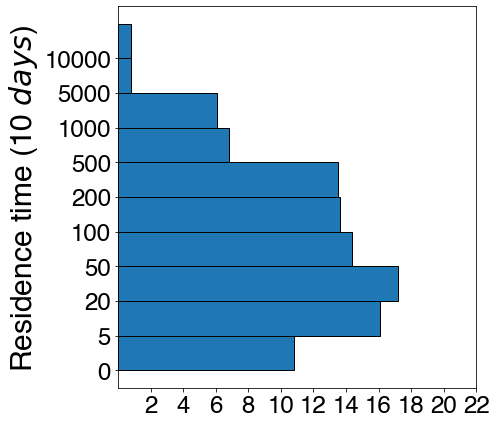

In [37]:
plt.figure(figsize=(7,6))
plt.rcParams["font.family"] = ["Helvetica"]
# matplotlib histogram
bin = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
labels = ['0','5','20','50','100','200','500','1000','5000','10000']
plt.hist(resu_rest, color = 'tab:blue', edgecolor = 'black', density=True,
          bins = bin, orientation='horizontal',align='right',label=labels,)
plt.yticks([0,1,2,3,4,5,6,7,8,9], labels, fontsize=24)
plt.ylabel('Residence time (10 ${days}$)',fontsize=30)
plt.xticks([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22],
           [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], fontsize=24)
plt.tight_layout()
plt.savefig('./Fig10g.png', dpi=1000)

In [38]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,6))
    data , x_e, y_e = np.histogram2d(x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    z2 = z/x.shape[0]*100
    if sort :
        idx = z2.argsort()
        x, y, z2 = x[idx], y[idx], z2[idx]
    split_area = np.log(np.array([50,200,1000,2000,5000,10000,50000,100000]))
    plt.vlines(split_area,-2,12,linestyles='dashed',color='red')
    ax1 = ax.scatter(x, y, c=z2, cmap='turbo', **kwargs )
    ax.set_ylabel('Pred. SDD(${m}$)',fontsize=28)
    ax.set_xlabel('${Ln}$[Residence time(${days}$)]',fontsize=28)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylim([0,8.5])
    return ax1, ax,fig

In [39]:
mean_rest = []
for i in range(np.int(np.min(np.log(rest_all2))), np.int(np.max(np.log(rest_all2))+1)):
    num_mid = []
    cal_mid = []
    for j in range(len(rest_all2)):
        if np.log(rest_all2)[j] >= i and np.log(rest_all2)[j] < i + 1:
            num_mid.append(j)
            cal_mid.append(sdd_all3[j])
    mean_rest.append(np.nanmean(cal_mid))

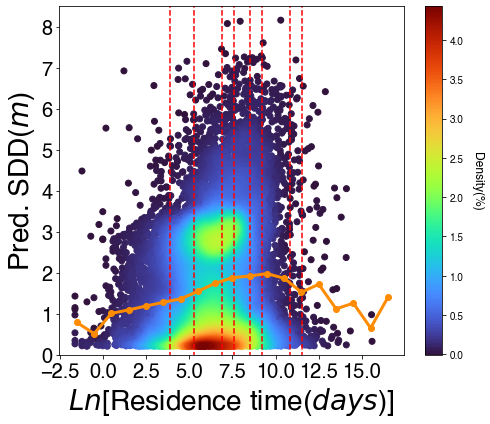

In [40]:
ax1, ax, fig = density_scatter(np.log(rest_all2), sdd_all3, bins=[20,20])
plt.plot([-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5], mean_rest, linewidth=3,marker='o',color='darkorange')
clb = fig.colorbar(ax1, orientation='vertical')
clb.set_label('Density(%)', labelpad=20, y=0.5, rotation=270, fontsize=12)
plt.tight_layout()
plt.savefig('./10h.png', dpi=1000)

In [41]:
'''Area/depth'''
atd_all = df_sdd['Area'].values/(df_sdd['Depth'].values/1000)
resu_atd = np.zeros_like(atd_all)

In [42]:
for i in range(atd_all.shape[0]):
    if atd_all[i] >= 0 and atd_all[i] < 200:
        resu_atd[i] = 0
    elif atd_all[i] >= 200 and atd_all[i] < 1000:
        resu_atd[i] = 1
    elif atd_all[i] >= 1000 and atd_all[i] < 2000:
        resu_atd[i] = 2
    elif atd_all[i] >= 2000 and atd_all[i] < 5000:
        resu_atd[i] = 3
    elif atd_all[i] >= 5000 and atd_all[i] < 10000:
        resu_atd[i] = 4
    elif atd_all[i] >= 10000 and atd_all[i] < 15000:
        resu_atd[i] = 5
    elif atd_all[i] >= 15000 and atd_all[i] < 20000:
        resu_atd[i] = 6
    elif atd_all[i] >= 20000 and atd_all[i] < 50000:
        resu_atd[i] = 7
    elif atd_all[i] >= 50000 and atd_all[i] < 100000:
        resu_atd[i] = 8
    elif atd_all[i] >= 100000:
        resu_atd[i] = 9
del i

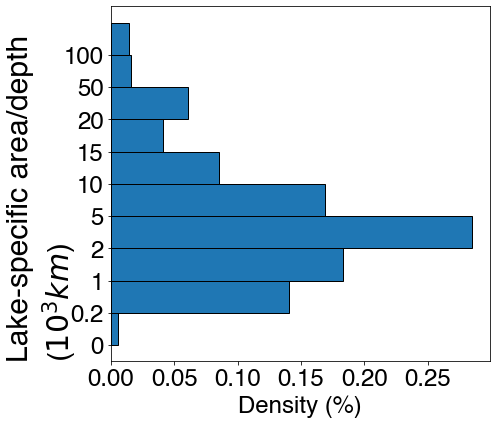

In [43]:
plt.figure(figsize=(7,6))
plt.rcParams["font.family"] = ["Helvetica"]
bin = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
labels = ['0','0.2','1','2','5','10','15','20','50','100']
plt.hist(resu_atd, color = 'tab:blue', edgecolor = 'black', density=True,
          bins = bin, orientation='horizontal',align='right',label=labels,)
plt.yticks([0,1,2,3,4,5,6,7,8,9], labels, fontsize=24)
plt.ylabel('Lake-specific area/depth\n(${10^3 km}$)',fontsize=30,labelpad=-15,loc='bottom')
plt.xticks(fontsize=24)
plt.xlabel('Density (%)', fontsize=24)
plt.tight_layout()
plt.savefig('./10k.png', dpi=1000)

In [44]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    if ax is None :
        fig , ax = plt.subplots(figsize=(7,6))
    data , x_e, y_e = np.histogram2d(x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    z2 = z/x.shape[0]*100
    if sort :
        idx = z2.argsort()
        x, y, z2 = x[idx], y[idx], z2[idx]
    split_area = np.log(np.array([200,1000,2000,5000,10000,15000,20000,50000,100000,150000]))
    plt.vlines(split_area,-2,12,linestyles='dashed',color='red')
    ax1 = ax.scatter(x, y, c=z2, cmap='turbo',**kwargs )
    ax.set_ylabel('Pred. SDD(${m}$)',fontsize=28)
    ax.set_xlabel('${Ln}$[Area/Depth(${km}$)]',fontsize=28)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylim([0,8.5])
    return ax1, ax,fig

In [45]:
mean_atd = []
for i in range(np.int(np.min(np.log(atd_all))), np.int(np.max(np.log(atd_all)))+1):
    num_mid = []
    cal_mid = []
    for j in range(len(atd_all)):
        if np.log(atd_all)[j] >= i and np.log(atd_all)[j] < i + 1:
            num_mid.append(j)
            cal_mid.append(sdd_all[j])
    mean_atd.append(np.nanmean(cal_mid))

<ipython-input-45-eb7be96833ab>:13: RuntimeWarning: Mean of empty slice
  mean_atd.append(np.nanmean(cal_mid))


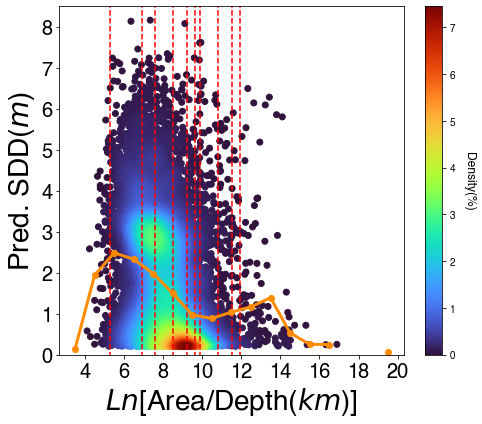

In [46]:
ax1, ax, fig = density_scatter(np.log(atd_all), sdd_all, bins=[20,20])
clb = fig.colorbar(ax1, orientation='vertical')
plt.plot([3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5], mean_atd, linewidth=3,marker='o',color='darkorange')
clb.set_label('Density(%)', labelpad=20, y=0.5, rotation=270, fontsize=12)
plt.tight_layout()
plt.savefig('./10l.png', dpi=1000)

In [47]:
df_sdd

,Unnamed: 0,Long,Lat,Depth,Area,Elev,slo,discharge,residence_time,Area/Depth,SDD_DGRN
0,0,-179.992498,65.362651,1.7,34.91,11.0,0.58,7.303,93.1,20.535294,0.590205
1,1,-178.425781,65.552083,3.8,19.83,16.0,1.34,1.090,800.2,5.218421,0.419538
2,2,-178.303125,71.221818,41.7,14.08,153.0,11.51,0.023,295656.0,0.337650,0.132637
3,3,-175.750586,66.183018,25.9,15.02,96.0,7.49,1.649,2726.2,0.579923,6.036397
4,5,-173.744792,65.873801,9.4,30.88,15.0,2.68,3.621,932.4,3.285106,0.266687
...,...,...,...,...,...,...,...,...,...,...,...
16516,16684,179.513897,71.317372,48.1,17.71,457.0,12.40,0.059,167078.1,0.368191,0.443440
16517,16685,179.561616,71.011534,57.5,18.43,333.0,14.35,0.015,816912.4,0.320522,0.301635
16518,16686,179.657728,65.609374,9.3,17.30,47.0,2.99,1.057,1761.3,1.860215,0.491394
16519,16687,179.777005,67.504004,10.9,36.63,195.0,2.93,16.234,284.6,3.360550,6.441444


In [48]:
df_input = df_sdd[['Area','Depth','Elev','slo','discharge','residence_time','Area/Depth']].values
df_input = df_sdd[['Area','Depth','Elev','discharge','residence_time','Area/Depth']].values
sdd_out = df_sdd['SDD_DGRN'].values

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0,n_jobs=-1)
rf.fit(df_input, sdd_out)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [50]:
feat_labels = ['Area','Depth','Elevation','Discharge','Residence time','Area/Depth']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(df_input.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Depth                          0.310511
 2) Elevation                      0.200288
 3) Residence time                 0.151426
 4) Discharge                      0.128005
 5) Area/Depth                     0.109637
 6) Area                           0.100134


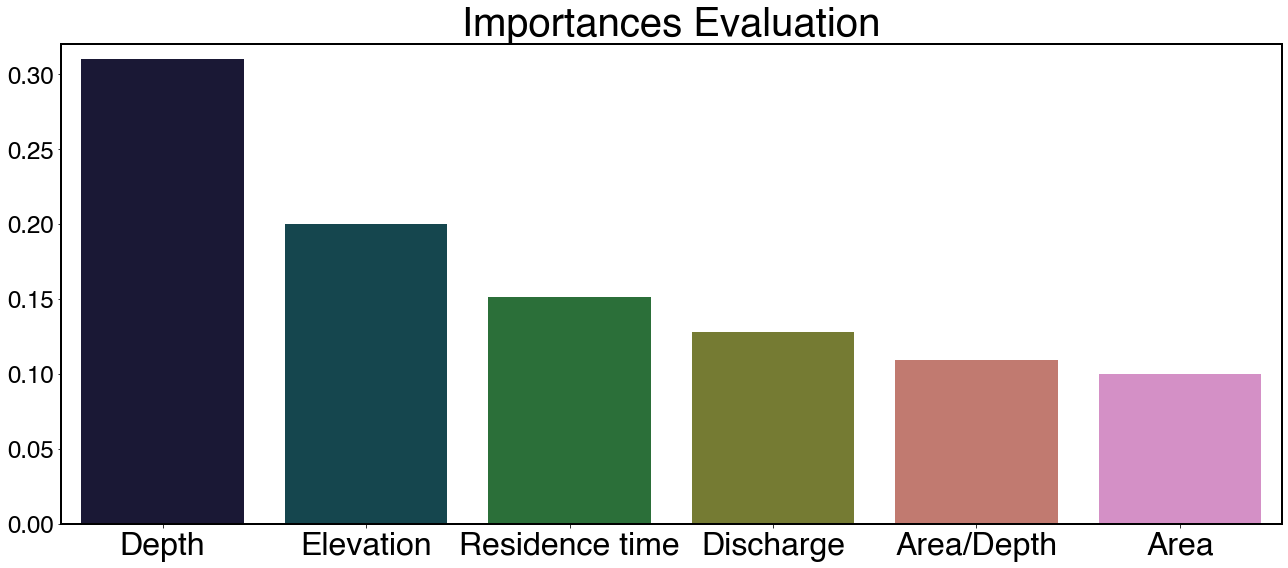

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = ["Helvetica"]
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im

def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))

xmin, xmax = xlim = 0, 7
ymin, ymax = ylim = 0, 0.35

fig, ax = plt.subplots(figsize=(18,8))
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)
x = indices
y = importances
plt.bar(0.5, importances[indices[0]], 0.8, color=sns.color_palette("cubehelix", 8)[0])
plt.bar(1.5, importances[indices[1]], 0.8, color=sns.color_palette("cubehelix", 8)[1])
plt.bar(2.5, importances[indices[2]], 0.8, color=sns.color_palette("cubehelix", 8)[2]) 
plt.bar(3.5, importances[indices[3]], 0.8, color=sns.color_palette("cubehelix", 8)[3]) 
plt.bar(4.5, importances[indices[4]], 0.8, color=sns.color_palette("cubehelix", 8)[4]) 
plt.bar(5.5, importances[indices[5]], 0.8, color=sns.color_palette("cubehelix", 8)[5]) 

ax.set_aspect('auto')
plt.xlim([0,6])
plt.ylim([0,0.32])
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], [feat_labels[indices[0]],feat_labels[indices[1]],
        feat_labels[indices[2]],feat_labels[indices[3]],feat_labels[indices[4]],feat_labels[indices[5]]], fontsize=32, weight='bold')
plt.title('Importances Evaluation', fontsize=40)
plt.yticks(fontsize=24)
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.tight_layout()
plt.savefig('./10m.png', dpi=1000)